### 공분산


In [29]:
import pandas as pd
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [30]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [31]:
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


In [32]:
Y = df['body_shape']
X = df.drop(['body_shape'],axis=1)

#standardscaler, minmaxscaler 등
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

X_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

### Covariance Matrix of Features

In [48]:
import numpy as np

features = X_std.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

### 고유벡터와 고유값 with 공분산 행렬

In [49]:
eig_vals , eig_vecs = np.linalg.eig(cov_matrix)

In [51]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [52]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [53]:
a=eig_vecs[0]*eig_vals
a

array([-2.06541336, -0.01425358, -0.06463089,  0.03230501,  0.03044642])

In [39]:
sum(eig_vals)

5.555555555555561

In [40]:
eig_vecs[0]/sum(eig_vals)

array([-0.0914409 , -0.00305887, -0.15248053,  0.02094813,  0.01844097])

### project data into  selected eigen vector

In [41]:
projected_X = X_std.dot(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [42]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis']=0.0
result['label'] = Y
result.head()

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat


c:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

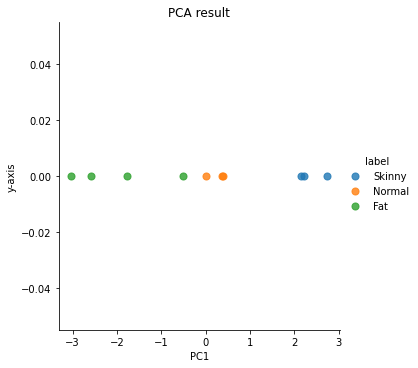

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot('PC1','y-axis',data=result, fit_reg=False,scatter_kws={'s':50}, hue='label')
plt.title('PCA result')

### Sklearn PCA 라이브러리 이용



In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_X = pca.fit_transform(X_std)
pca_X

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

c:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

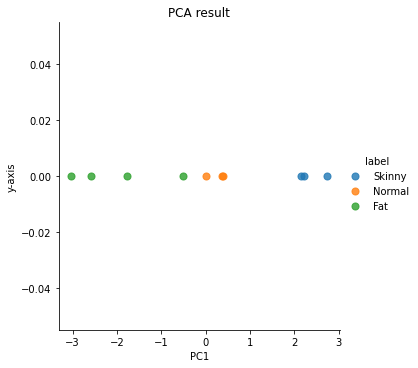

In [45]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis']=0.0
result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,scatter_kws={'s':50}, hue='label')
plt.title('PCA result')